In [2]:
# Group Project
# Eric Meehan
# 2020-12-01

In [ ]:
# Racial Breakdown of Population for Virginia

In [14]:
# Import Utilities and set parameters
import urllib.request
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/Virginia"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
soup.title.string

'Virginia - Wikipedia'

In [19]:
# Find the table referring to climate data

all_sortable_tables = soup.find_all('table', class_="wikitable")
all_sortable_tables

[<table class="wikitable" style="margin:1em auto 1em auto">
 <tbody><tr>
 <td>
 <table class="wikitable" style="margin:0.5em; border:none;">
 <tbody><tr>
 <th colspan="2" style="background:#ccf;">Ethnicity (<a href="#CITEREFethnicity">2019 est.</a>)
 </th>
 <td rowspan="6" style="border:none">
 </td>
 <th style="background:#ccf;">Largest ancestries by county
 </th>
 <th colspan="3" style="background:#ccf;">Ancestry (<a href="#CITEREFancestry">2018 est.</a>)
 </th></tr>
 <tr>
 <td>Non-Hispanic white
 </td>
 <td align="right">61.5%
 </td>
 <td rowspan="5" style="text-align:center; width:280px;">
 <p><a class="image" href="/wiki/File:Virginia_Ancestries_by_County_2018.svg"><img alt="Virginia counties colored either red, blue, yellow, green, or purple based on the populations most common ancestry. The south-east is predominately purple for African American, while the west is mostly red for American. The north has yellow for German, with two small areas green for Irish. Yellow is also found

In [20]:
# Specify the first table for data collection
right_table = all_sortable_tables[0]
right_table

<table class="wikitable" style="margin:1em auto 1em auto">
<tbody><tr>
<td>
<table class="wikitable" style="margin:0.5em; border:none;">
<tbody><tr>
<th colspan="2" style="background:#ccf;">Ethnicity (<a href="#CITEREFethnicity">2019 est.</a>)
</th>
<td rowspan="6" style="border:none">
</td>
<th style="background:#ccf;">Largest ancestries by county
</th>
<th colspan="3" style="background:#ccf;">Ancestry (<a href="#CITEREFancestry">2018 est.</a>)
</th></tr>
<tr>
<td>Non-Hispanic white
</td>
<td align="right">61.5%
</td>
<td rowspan="5" style="text-align:center; width:280px;">
<p><a class="image" href="/wiki/File:Virginia_Ancestries_by_County_2018.svg"><img alt="Virginia counties colored either red, blue, yellow, green, or purple based on the populations most common ancestry. The south-east is predominately purple for African American, while the west is mostly red for American. The north has yellow for German, with two small areas green for Irish. Yellow is also found in spots in the wes

In [43]:
# Scrape data from cells
Ethnicities = []
Percentages = []
for row in right_table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells) == 5 or len(cells) == 6:
        Ethnicities.append(cells[0].find(text=True))
        Percentages.append(cells[1].find(text=True))

['61.5%\n', '19.9%\n', '9.6%\n', '6.9%\n', '0.5%\n']
['Non-Hispanic white\n', 'Black or African American\n', 'Hispanic or Latino (of any race)\n', 'Asian\n', 'American Indian and Alaska Native\n']


In [45]:
# Format the data
for i in range(len(Ethnicities)):
        Ethnicities[i] = Ethnicities[i].replace("\n", "")
for i in range(len(Percentages)):
        Percentages[i] = float(Percentages[i].replace("%\n", ""))

In [51]:
# Generating a graph
# Import tools
from matplotlib import pyplot as plt
import numpy as np

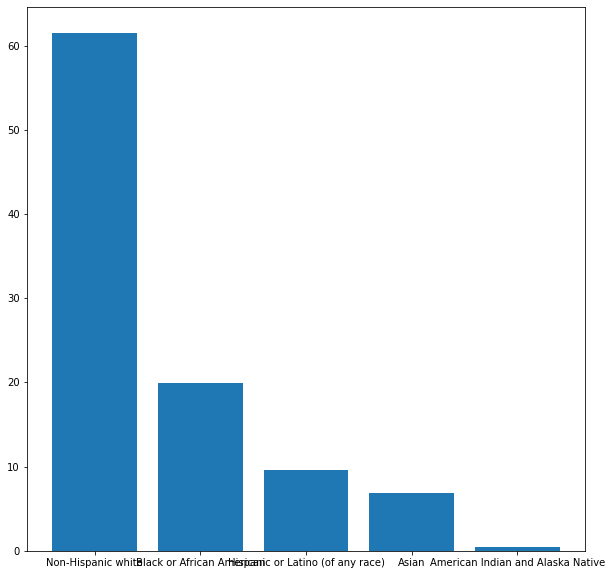

In [52]:
# Generate a graph to display the data
Percentages = np.array(Percentages)
plt.figure(figsize=(10,10))
plt.bar(range(0, 5), Percentages)
plt.xticks(range(0, len(Percentages)), Ethnicities)
plt.show()